In [16]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand written digits

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

x_train = tf.keras.utils.normalize(x_train, axis = 1) #normalize the numbers so  that it is between 0 and 1 
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))#nn.relu is the default activation layer 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #second layer added on top 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.softmax)) 

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)



 
 

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 208us/sample - loss: 0.3251 - accuracy: 0.9098
Epoch 2/3
60000/60000 [==============================] - 18s 302us/sample - loss: 0.1228 - accuracy: 0.9622
Epoch 3/3
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0828 - accuracy: 0.9741


In [17]:
val_loss, val_acc = model.evaluate(x_test,y_test)

print(val_loss,val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09787332664243877 0.9683


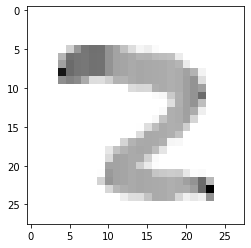

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[28], cmap = plt.cm.binary) 
plt.show() 
print(x_train[28])



In [19]:
model.save('number_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: number_reader.model/assets


In [20]:
new_model = tf.keras.models.load_model('number_reader.model')

In [21]:
prediction = new_model.predict([x_test])

In [22]:
print(prediction)

[[2.80391163e-07 2.38646135e-06 3.00522515e-05 ... 1.26461818e-12
  8.38019812e-13 7.25868476e-13]
 [2.81429435e-10 3.39386228e-04 9.99659657e-01 ... 8.12076003e-16
  9.91797019e-16 3.76827276e-16]
 [6.91044875e-08 9.99616623e-01 8.09932681e-05 ... 6.91273538e-10
  7.07178149e-10 3.36658285e-10]
 ...
 [3.33125385e-08 9.94943366e-06 2.05902779e-07 ... 2.19683022e-10
  5.64964776e-11 1.11334192e-10]
 [9.99272670e-05 3.60350532e-06 3.74530555e-06 ... 3.81270802e-08
  5.21567722e-09 3.16067550e-09]
 [4.42039936e-06 1.33797002e-07 1.07923415e-05 ... 2.79802535e-11
  3.17744338e-11 1.34308103e-11]]


In [23]:
import numpy as np 

print(np.argmax(prediction[0]))


7


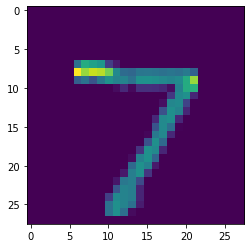

In [24]:
plt.imshow(x_test[0])
plt.show()
